<a href="https://colab.research.google.com/github/jyoti612/adultincome-prediction/blob/main/adult_income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from google.colab import drive

In [27]:
drive.mount('/content/drive')
filename = '/content/drive/My Drive/adult.csv'
df= pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [29]:
df.shape

(48842, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [31]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df.replace('?' ,np.NaN ,inplace=True)
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', nan,
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [13]:
df['native-country'].unique()

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [14]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

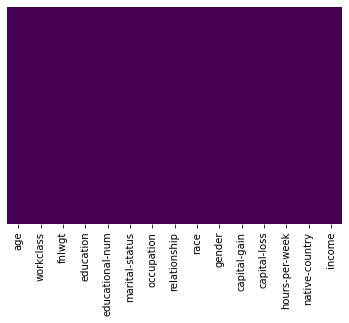

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
print('Workclass, ? numbers: ',df['workclass'][df['workclass']=='?'].count())
print('Percentage: {0:.2f}%'.format(df['workclass'][df['workclass']=='?'].count()/(48842)*100))

Workclass, ? numbers:  2799
Percentage: 5.73%


In [34]:
print('Occupation, ? numbers: ',df['occupation'][df['occupation']=='?'].count())
print('Percentage: {0:.2f}%'.format(df['occupation'][df['occupation']=='?'].count()/(48842)*100))

Occupation, ? numbers:  2809
Percentage: 5.75%


In [35]:
print('Native Country, ? numbers: ',df['native-country'][df['native-country']=='?'].count())
print('Percentage: {0:.2f}%'.format(df['native-country'][df['native-country']=='?'].count()/(48842)*100))

Native Country, ? numbers:  857
Percentage: 1.75%


In [36]:
import statistics 
from statistics import mode 
  
def most_common(List): 
    return(mode(List))
print(most_common(df['workclass']))
print(most_common(df['occupation']))
print(most_common(df['native-country']))

Private
Prof-specialty
United-States


In [37]:
df['workclass']=df['workclass'].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-specialty')
df['native-country']=df['native-country'].replace('?','United-States')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [38]:
cols =['workclass', 'education','marital-status', 'occupation',
               'relationship','race', 'gender', 'native-country', 'income'] 
for i in cols:
    print(i,':')
    print('')
    print(df[i].value_counts())
    print('')

workclass :

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

education :

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

marital-status :

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

occupation :

Prof-specialty       8981
Craft-repair         6112
Exec-managerial

In [39]:
df.education=df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'left')
df.education=df.education.replace('HS-grad','school')
df.education=df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df.education=df.education.replace('Bachelors','undergrad')
df.education=df.education.replace('Masters','grad')
df.education=df.education.replace('Doctorate','doc')
gnb.fit(X_train, Y_train)

GaussianNB()

In [40]:
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status']=df['marital-status'].replace(['Never-married','Divorced','Separated','Widowed',
                                                   'Married-spouse-absent'], 'not-married')
#income
df.income=df.income.replace('<=50K', 0)
df.income=df.income.replace('>50K', 1)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,left,7,not-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,school,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,higher,10,not-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [41]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Text(0.5, 1.0, 'Age Distribution')

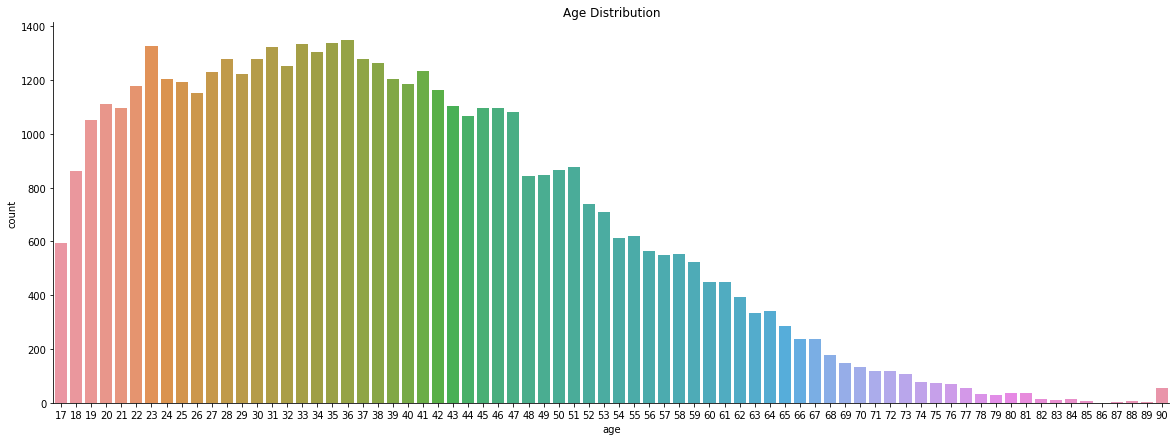

In [42]:
plt.figure(figsize=(20,7))
sns.countplot(x='age',data=df)
sns.despine()
plt.title('Age Distribution')

In [43]:
px.histogram(df,x='age',color='gender',nbins=40)

In [44]:
px.pie(df,values='educational-num',names='education',title='Percentage of Education',
      color_discrete_sequence=px.colors.qualitative.G10)

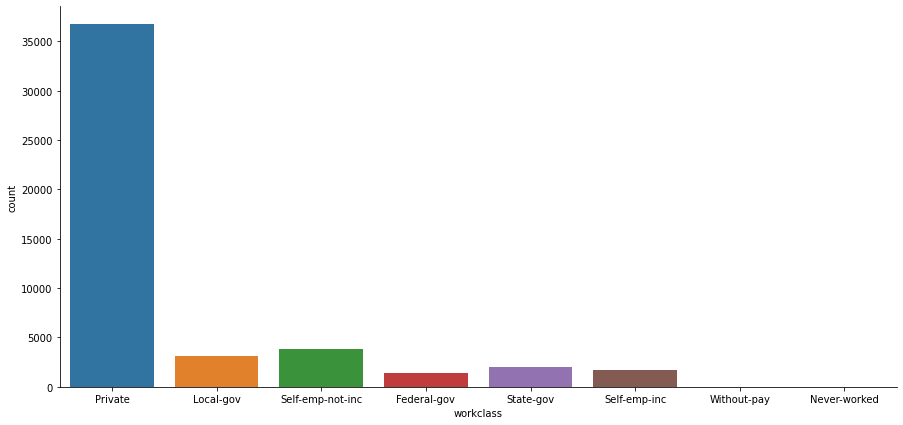

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x='workclass',data=df)
sns.despine()

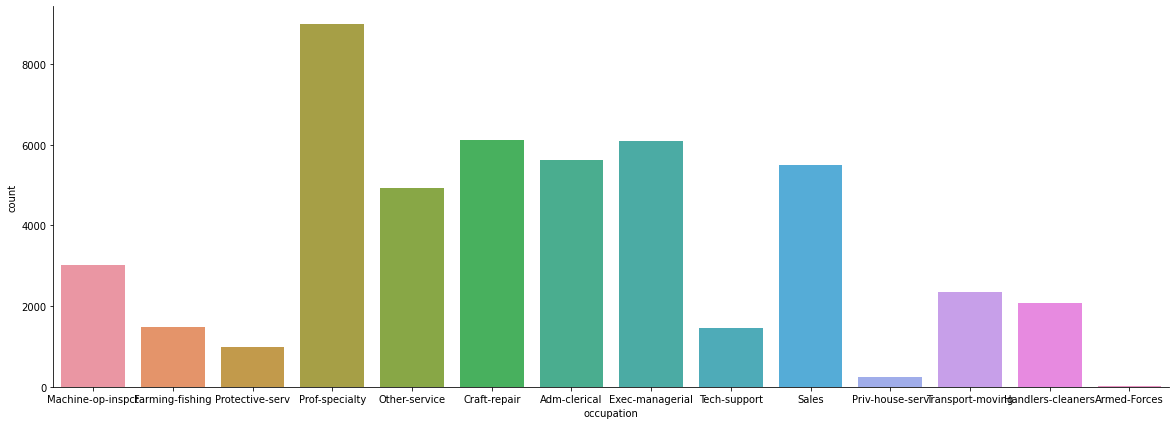

In [46]:
plt.figure(figsize=(20,7))
sns.countplot(x='occupation',data=df)
sns.despine()

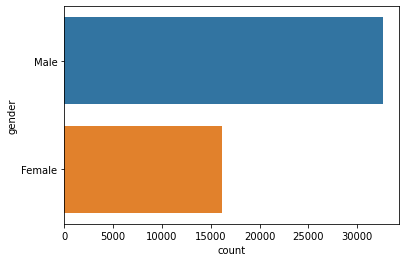

In [47]:
sns.countplot(y="gender",data=df)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,3,6,1,6,3,2,1,0,0,39,38,0
1,21,3,4212,4,8,0,4,0,4,1,0,0,49,38,0
2,11,1,25340,2,11,0,10,0,4,1,0,0,39,38,1
3,27,3,11201,2,9,0,6,0,2,1,98,0,39,38,1
4,1,3,5411,2,9,1,9,3,4,0,0,0,29,38,0


In [49]:
std_sclr=StandardScaler().fit(df1.drop('income',axis=1))
X=std_sclr.transform(df1.drop('income',axis=1))
y=df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
forest=RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [51]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.979
Accuracy on test set: 0.844


Feature: 0, Score: 0.14747
Feature: 1, Score: 0.03877
Feature: 2, Score: 0.17673
Feature: 3, Score: 0.02878
Feature: 4, Score: 0.08870
Feature: 5, Score: 0.12258
Feature: 6, Score: 0.06280
Feature: 7, Score: 0.05306
Feature: 8, Score: 0.01435
Feature: 9, Score: 0.00716
Feature: 10, Score: 0.11637
Feature: 11, Score: 0.03815
Feature: 12, Score: 0.08891
Feature: 13, Score: 0.01616


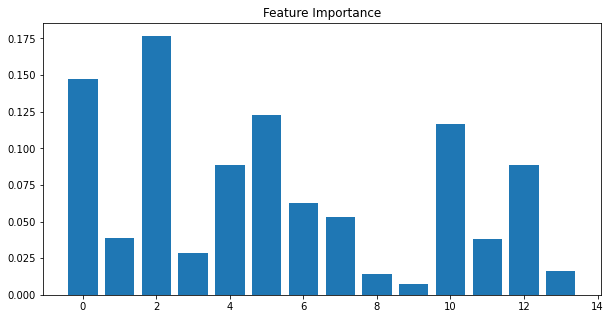

In [52]:
importance=forest.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.show()

In [53]:
gbrt=GradientBoostingClassifier(max_depth=1,learning_rate=1,random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, random_state=0)

In [54]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.867
Accuracy on test set: 0.864


In [55]:
importance=gbrt.feature_importances_

Feature: 0, Score: 0.03534
Feature: 1, Score: 0.00630
Feature: 2, Score: 0.00242
Feature: 3, Score: 0.01841
Feature: 4, Score: 0.14443
Feature: 5, Score: 0.45268
Feature: 6, Score: 0.01448
Feature: 7, Score: 0.00720
Feature: 8, Score: 0.00118
Feature: 9, Score: 0.00293
Feature: 10, Score: 0.22683
Feature: 11, Score: 0.05892
Feature: 12, Score: 0.02768
Feature: 13, Score: 0.00119


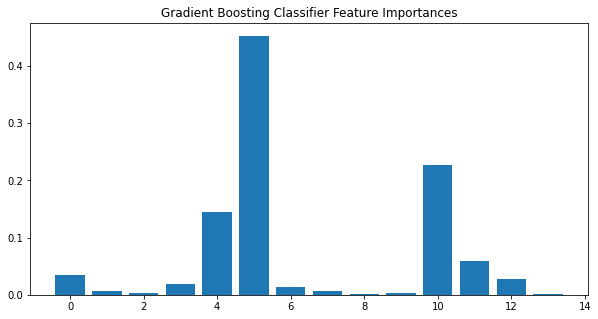

In [56]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.title('Gradient Boosting Classifier Feature Importances')
plt.show()